Import packages

In [121]:
import pandas as pd
import numpy as np
import gapandas4 as gp

import os

#from pandas import json_normalize
#import json

Properties for connections

In [106]:
property_id = "298727788"
credentials_json_path="/Users/emil/miniforge3/envs/googleapi/Notebooks/Analytics/client_secrets.json"

service_account = credentials_json_path

Get metadata

In [107]:
metadata = gp.get_metadata(service_account, property_id)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

dfMetadata = pd.DataFrame(metadata)

Dates to fetch data

In [108]:
start_date = "2023-05-01"
end_date="2023-05-20"

Batch-queries

In [133]:
# List of dimensions and metrics

# From analyticsreports

# dateList is all dimensions
dateList = ["date"]

# masterList is all metrics
masterList = ["totalUsers","newUsers","activeUsers","screenPageViews","sessions","engagedSessions",
              "userEngagementDuration","eventCount"]

# masterList2 is all metrics
masterList2 = ["organicGoogleSearchClicks","organicGoogleSearchImpressions",
               "organicGoogleSearchClickThroughRate","organicGoogleSearchAveragePosition"]

# List3 is all metrics
activityList = ["active28DayUsers","active7DayUsers","activeUsers","screenPageViews","sessions","engagedSessions",
              "userEngagementDuration","eventCount"]

# List4 is all metrics
loyaltyList = ["wauPerMau","dauPerMau","dauPerWau","screenPageViews","sessions","engagedSessions",
              "userEngagementDuration","eventCount"]

# Lists for each measure

# Empty List of filenames to fill with measures below and use when writing df to .csv


# Batch 1 - Lists


countryIDlist = ["countryID"]
countryID = dateList + countryIDlist + masterList

regionList = ["region"]
region = dateList + regionList + masterList

cityList = ["city"]
city = dateList + cityList + masterList

languageList = ["language"]
language = dateList + languageList + masterList

userAgeBracketList = ["userAgeBracket"]
userAgeBracket = dateList + userAgeBracketList + masterList

# Batch 2 - Lists
filename6 = "city"
userGenderList = ["userGender"]
userGender = dateList + userGenderList + masterList

filename7 = "city"
brandingInterestList = ["brandingInterest"]
brandingInterest = dateList + brandingInterestList + masterList

filename3 = "city"
browserList = ["browser"]
browser = dateList + browserList + masterList

filename3 = "city"
deviceCategoryList = ["deviceCategory"]
deviceCategory = dateList + deviceCategoryList + masterList

filename3 = "city"
mobileDeviceBrandingList = ["mobileDeviceBranding"]
mobileDeviceBranding = dateList + mobileDeviceBrandingList + masterList

#notset ; appversion deviceModel mobiledevicemarketingname 
# not needed: streamID and Name (only got 1 value) language + languageCode, in other list
# operatingSystemVersion, operatingSystemWithVersion not needed I dont think

# Batch 3 - Lists
filename3 = "city"
mobileDeviceModelList = ["mobileDeviceModel"]
mobileDeviceModel = dateList + mobileDeviceModelList + masterList

filename3 = "city"
operatingSystemList = ["operatingSystem"]
operatingSystem = dateList + operatingSystemList + masterList

filename3 = "city"
platformList = ["platform"]
platform = dateList + platformList + masterList

filename3 = "city"
platformDeviceCategoryList = ["platformDeviceCategory"]
platformDeviceCategory = dateList + platformDeviceCategoryList + masterList

filename3 = "city"
screenResolutionList = ["screenResolution"]
screenResolution = dateList + screenResolutionList + masterList

#DEVICE CATEGORY, PLATFORM and PLATFORMDEVICECATEGORY not needed all 3.

# Batch 4 - Lists

filename3 = "city"
firstUserDefaultChannelGroupList = ["firstUserDefaultChannelGroup"]
firstUserDefaultChannelGroup = dateList + firstUserDefaultChannelGroupList + masterList

filename3 = "city"
firstUserSourceList = ["firstUserSource"]
firstUserSource = dateList + firstUserSourceList + masterList

filename3 = "city"
sessionDefaultChannelGroupList = ["sessionDefaultChannelGroup"]
sessionDefaultChannelGroup = dateList + sessionDefaultChannelGroupList + masterList

filename3 = "city"
sessionSourceList = ["sessionSource"]
sessionSource = dateList + sessionSourceList + masterList

# Batch 5 - Lists

# max 10 lines in request so have to merge two requests.

filename3 = "city"
landingPageList = ["landingPage"]
landingPage = dateList + landingPageList + masterList

filename3 = "city"
eventNameList = ["eventName"]
eventName = dateList + eventNameList + masterList

filename3 = "city"
activity = dateList + activityList 

filename3 = "city"
loyalty = dateList + loyaltyList


#linkUrlList = ["linkUrl"]
#linkUrl = ["date"] + linkUrlList + masterList2 + masterList



# firstUserManualTerm, firstUserSourcePlatform NOTSET
# firstUserCampaignName and ID not needed since got DefaultChannelGroup
# All Ad-dimensions seems to be empty, same for 360.

#"sessionGoogleAdsAdNetworkType",
#"sessionSa360EngineAccountType","sessionSa360Source"]

# NOTSET "firstUserGoogleAdsAdNetworkType","firstUserGoogleAdsCampaignType"

# Fill list with filenames
fileNames = [eval('filename%d' %i) for i in range(1,3)]


In [134]:
fileNames

['countryID', 'region']

In [111]:
# Batch 1 - Request
batch_report_request1 = gp.BatchRunReportsRequest(
    property=f"properties/{property_id}",
    requests=[
      
        gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=countryID[0]),
                gp.Dimension(name=countryID[1]),
            ],
            metrics=[
                gp.Metric(name=countryID[2]),
                gp.Metric(name=countryID[3]),
                gp.Metric(name=countryID[4]),
                gp.Metric(name=countryID[5]),
                gp.Metric(name=countryID[6]),
                gp.Metric(name=countryID[7]),
                gp.Metric(name=countryID[8]),
                gp.Metric(name=countryID[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
           gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=region[0]),
                gp.Dimension(name=region[1]),
            ],
            metrics=[
                gp.Metric(name=region[2]),
                gp.Metric(name=region[3]),
                gp.Metric(name=region[4]),
                gp.Metric(name=region[5]),
                gp.Metric(name=region[6]),
                gp.Metric(name=region[7]),
                gp.Metric(name=region[8]),
                gp.Metric(name=region[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=city[0]),
                gp.Dimension(name=city[1]),
            ],
            metrics=[
                gp.Metric(name=city[2]),
                gp.Metric(name=city[3]),
                gp.Metric(name=city[4]),
                gp.Metric(name=city[5]),
                gp.Metric(name=city[6]),
                gp.Metric(name=city[7]),
                gp.Metric(name=city[8]),
                gp.Metric(name=city[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=language[0]),
                gp.Dimension(name=language[1]),
            ],
            metrics=[
                gp.Metric(name=language[2]),
                gp.Metric(name=language[3]),
                gp.Metric(name=language[4]),
                gp.Metric(name=language[5]),
                gp.Metric(name=language[6]),
                gp.Metric(name=language[7]),
                gp.Metric(name=language[8]),
                gp.Metric(name=language[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
                
           gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=userAgeBracket[0]),
                gp.Dimension(name=userAgeBracket[1]),
            ],
            metrics=[
                gp.Metric(name=userAgeBracket[2]),
                gp.Metric(name=userAgeBracket[3]),
                gp.Metric(name=userAgeBracket[4]),
                gp.Metric(name=userAgeBracket[5]),
                gp.Metric(name=userAgeBracket[6]),
                gp.Metric(name=userAgeBracket[7]),
                gp.Metric(name=userAgeBracket[8]),
                gp.Metric(name=userAgeBracket[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
    ]
)


In [112]:
# Batch 2 - Request
batch_report_request2 = gp.BatchRunReportsRequest(
    property=f"properties/{property_id}",
    requests=[
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=userGender[0]),
                gp.Dimension(name=userGender[1]),
            ],
            metrics=[
                gp.Metric(name=userGender[2]),
                gp.Metric(name=userGender[3]),
                gp.Metric(name=userGender[4]),
                gp.Metric(name=userGender[5]),
                gp.Metric(name=userGender[6]),
                gp.Metric(name=userGender[7]),
                gp.Metric(name=userGender[8]),
                gp.Metric(name=userGender[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
      
        gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=brandingInterest[0]),
                gp.Dimension(name=brandingInterest[1]),
            ],
            metrics=[
                gp.Metric(name=brandingInterest[2]),
                gp.Metric(name=brandingInterest[3]),
                gp.Metric(name=brandingInterest[4]),
                gp.Metric(name=brandingInterest[5]),
                gp.Metric(name=brandingInterest[6]),
                gp.Metric(name=brandingInterest[7]),
                gp.Metric(name=brandingInterest[8]),
                gp.Metric(name=brandingInterest[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=browser[0]),
                gp.Dimension(name=browser[1]),
            ],
            metrics=[
                gp.Metric(name=browser[2]),
                gp.Metric(name=browser[3]),
                gp.Metric(name=browser[4]),
                gp.Metric(name=browser[5]),
                gp.Metric(name=browser[6]),
                gp.Metric(name=browser[7]),
                gp.Metric(name=browser[8]),
                gp.Metric(name=browser[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=deviceCategory[0]),
                gp.Dimension(name=deviceCategory[1]),
            ],
            metrics=[
                gp.Metric(name=deviceCategory[2]),
                gp.Metric(name=deviceCategory[3]),
                gp.Metric(name=deviceCategory[4]),
                gp.Metric(name=deviceCategory[5]),
                gp.Metric(name=deviceCategory[6]),
                gp.Metric(name=deviceCategory[7]),
                gp.Metric(name=deviceCategory[8]),
                gp.Metric(name=deviceCategory[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=mobileDeviceBranding[0]),
                gp.Dimension(name=mobileDeviceBranding[1]),
            ],
            metrics=[
                gp.Metric(name=mobileDeviceBranding[2]),
                gp.Metric(name=mobileDeviceBranding[3]),
                gp.Metric(name=mobileDeviceBranding[4]),
                gp.Metric(name=mobileDeviceBranding[5]),
                gp.Metric(name=mobileDeviceBranding[6]),
                gp.Metric(name=mobileDeviceBranding[7]),
                gp.Metric(name=mobileDeviceBranding[8]),
                gp.Metric(name=mobileDeviceBranding[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
         
    ]
)


In [113]:
# Batch 3 - Request
batch_report_request3 = gp.BatchRunReportsRequest(
    property=f"properties/{property_id}",
    requests=[
      
        gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=mobileDeviceModel[0]),
                gp.Dimension(name=mobileDeviceModel[1]),
            ],
            metrics=[
                gp.Metric(name=mobileDeviceModel[2]),
                gp.Metric(name=mobileDeviceModel[3]),
                gp.Metric(name=mobileDeviceModel[4]),
                gp.Metric(name=mobileDeviceModel[5]),
                gp.Metric(name=mobileDeviceModel[6]),
                gp.Metric(name=mobileDeviceModel[7]),
                gp.Metric(name=mobileDeviceModel[8]),
                gp.Metric(name=mobileDeviceModel[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
           gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=operatingSystem[0]),
                gp.Dimension(name=operatingSystem[1]),
            ],
            metrics=[
                gp.Metric(name=operatingSystem[2]),
                gp.Metric(name=operatingSystem[3]),
                gp.Metric(name=operatingSystem[4]),
                gp.Metric(name=operatingSystem[5]),
                gp.Metric(name=operatingSystem[6]),
                gp.Metric(name=operatingSystem[7]),
                gp.Metric(name=operatingSystem[8]),
                gp.Metric(name=operatingSystem[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=platform[0]),
                gp.Dimension(name=platform[1]),
            ],
            metrics=[
                gp.Metric(name=platform[2]),
                gp.Metric(name=platform[3]),
                gp.Metric(name=platform[4]),
                gp.Metric(name=platform[5]),
                gp.Metric(name=platform[6]),
                gp.Metric(name=platform[7]),
                gp.Metric(name=platform[8]),
                gp.Metric(name=platform[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
         gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=platformDeviceCategory[0]),
                gp.Dimension(name=platformDeviceCategory[1]),
            ],
            metrics=[
                gp.Metric(name=platformDeviceCategory[2]),
                gp.Metric(name=platformDeviceCategory[3]),
                gp.Metric(name=platformDeviceCategory[4]),
                gp.Metric(name=platformDeviceCategory[5]),
                gp.Metric(name=platformDeviceCategory[6]),
                gp.Metric(name=platformDeviceCategory[7]),
                gp.Metric(name=platformDeviceCategory[8]),
                gp.Metric(name=platformDeviceCategory[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=screenResolution[0]),
                gp.Dimension(name=screenResolution[1]),
            ],
            metrics=[
                gp.Metric(name=screenResolution[2]),
                gp.Metric(name=screenResolution[3]),
                gp.Metric(name=screenResolution[4]),
                gp.Metric(name=screenResolution[5]),
                gp.Metric(name=screenResolution[6]),
                gp.Metric(name=screenResolution[7]),
                gp.Metric(name=screenResolution[8]),
                gp.Metric(name=screenResolution[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
    ]
)


In [114]:
# Batch 4 - Request
batch_report_request4 = gp.BatchRunReportsRequest(
    property=f"properties/{property_id}",
    requests=[
      
        gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=firstUserDefaultChannelGroup[0]),
                gp.Dimension(name=firstUserDefaultChannelGroup[1]),
            ],
            metrics=[
                gp.Metric(name=firstUserDefaultChannelGroup[2]),
                gp.Metric(name=firstUserDefaultChannelGroup[3]),
                gp.Metric(name=firstUserDefaultChannelGroup[4]),
                gp.Metric(name=firstUserDefaultChannelGroup[5]),
                gp.Metric(name=firstUserDefaultChannelGroup[6]),
                gp.Metric(name=firstUserDefaultChannelGroup[7]),
                gp.Metric(name=firstUserDefaultChannelGroup[8]),
                gp.Metric(name=firstUserDefaultChannelGroup[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
           gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=firstUserSource[0]),
                gp.Dimension(name=firstUserSource[1]),
            ],
            metrics=[
                gp.Metric(name=firstUserSource[2]),
                gp.Metric(name=firstUserSource[3]),
                gp.Metric(name=firstUserSource[4]),
                gp.Metric(name=firstUserSource[5]),
                gp.Metric(name=firstUserSource[6]),
                gp.Metric(name=firstUserSource[7]),
                gp.Metric(name=firstUserSource[8]),
                gp.Metric(name=firstUserSource[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=sessionDefaultChannelGroup[0]),
                gp.Dimension(name=sessionDefaultChannelGroup[1]),
            ],
            metrics=[
                gp.Metric(name=sessionDefaultChannelGroup[2]),
                gp.Metric(name=sessionDefaultChannelGroup[3]),
                gp.Metric(name=sessionDefaultChannelGroup[4]),
                gp.Metric(name=sessionDefaultChannelGroup[5]),
                gp.Metric(name=sessionDefaultChannelGroup[6]),
                gp.Metric(name=sessionDefaultChannelGroup[7]),
                gp.Metric(name=sessionDefaultChannelGroup[8]),
                gp.Metric(name=sessionDefaultChannelGroup[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
         gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=sessionSource[0]),
                gp.Dimension(name=sessionSource[1]),
            ],
            metrics=[
                gp.Metric(name=sessionSource[2]),
                gp.Metric(name=sessionSource[3]),
                gp.Metric(name=sessionSource[4]),
                gp.Metric(name=sessionSource[5]),
                gp.Metric(name=sessionSource[6]),
                gp.Metric(name=sessionSource[7]),
                gp.Metric(name=sessionSource[8]),
                gp.Metric(name=sessionSource[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
    ]
)

In [115]:
# Batch 5 - Request
batch_report_request5 = gp.BatchRunReportsRequest(
    property=f"properties/{property_id}",
    requests=[
      
        gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=landingPage[0]),
                gp.Dimension(name=landingPage[1]),
            ],
            metrics=[
                gp.Metric(name=landingPage[2]),
                gp.Metric(name=landingPage[3]),
                gp.Metric(name=landingPage[4]),
                gp.Metric(name=landingPage[5]),
                gp.Metric(name=landingPage[6]),
                gp.Metric(name=landingPage[7]),
                gp.Metric(name=landingPage[8]),
                gp.Metric(name=landingPage[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
           gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=eventName[0]),
                gp.Dimension(name=eventName[1]),
            ],
            metrics=[
                gp.Metric(name=eventName[2]),
                gp.Metric(name=eventName[3]),
                gp.Metric(name=eventName[4]),
                gp.Metric(name=eventName[5]),
                gp.Metric(name=eventName[6]),
                gp.Metric(name=eventName[7]),
                gp.Metric(name=eventName[8]),
                gp.Metric(name=eventName[9]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
         gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=activity[0]),
            ],
            metrics=[
                gp.Metric(name=activity[1]),
                gp.Metric(name=activity[2]),
                gp.Metric(name=activity[3]),
                gp.Metric(name=activity[4]),
                gp.Metric(name=activity[5]),
                gp.Metric(name=activity[6]),
                gp.Metric(name=activity[7]),
                gp.Metric(name=activity[8]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
          gp.RunReportRequest(
            dimensions=[
                gp.Dimension(name=loyalty[0]),
            ],
            metrics=[
                gp.Metric(name=loyalty[1]),
                gp.Metric(name=loyalty[2]),
                gp.Metric(name=loyalty[3]),
                gp.Metric(name=loyalty[4]),
                gp.Metric(name=loyalty[5]),
                gp.Metric(name=loyalty[6]),
                gp.Metric(name=loyalty[7]),
                gp.Metric(name=loyalty[8]),
            ],
            date_ranges=[gp.DateRange(start_date=start_date, end_date=end_date)]
        ),
        
    ]
)

Queries

In [116]:
# Batch 1 - Query
df1 = gp.query(service_account, batch_report_request1, report_type="batch_report")

# Batch 2 - Query
df2 = gp.query(service_account, batch_report_request2, report_type="batch_report")

# Batch 3 - Query
df3 = gp.query(service_account, batch_report_request3, report_type="batch_report")

# Batch 4 - Query
df4 = gp.query(service_account, batch_report_request4, report_type="batch_report")

# Batch 5 - Query
df5 = gp.query(service_account, batch_report_request5, report_type="batch_report")

Datatypes and sorting

In [117]:
# Convert data to datetimeobject in all dataframes

for n in range(len(df1)):
    df1[n]['date'] = pd.to_datetime(df1[n]['date'])
    
for n in range(len(df2)):
    df2[n]['date'] = pd.to_datetime(df2[n]['date'])
    
for n in range(len(df3)):
    df3[n]['date'] = pd.to_datetime(df3[n]['date'])
    
for n in range(len(df4)):
    df4[n]['date'] = pd.to_datetime(df4[n]['date'])
    
for n in range(len(df5)):
    df5[n]['date'] = pd.to_datetime(df5[n]['date'])

In [118]:
# Sorting of dataframes

df1[0] = df1[0].sort_values(countryID, ascending=True)
df1[1] = df1[1].sort_values(region, ascending=True)
df1[2] = df1[2].sort_values(city, ascending=True)
df1[3] = df1[3].sort_values(language, ascending=True)
df1[4] = df1[4].sort_values(userAgeBracket, ascending=True)

df2[0] = df2[0].sort_values(userGender, ascending=True)
df2[1] = df2[1].sort_values(brandingInterest, ascending=True)
df2[2] = df2[2].sort_values(browser, ascending=True)
df2[3] = df2[3].sort_values(deviceCategory, ascending=True)
df2[4] = df2[4].sort_values(mobileDeviceBranding, ascending=True)

df3[0] = df3[0].sort_values(mobileDeviceModel, ascending=True)
df3[1] = df3[1].sort_values(operatingSystem, ascending=True)
df3[2] = df3[2].sort_values(platform, ascending=True)
df3[3] = df3[3].sort_values(platformDeviceCategory, ascending=True)
df3[4] = df3[4].sort_values(screenResolution, ascending=True)

df4[0] = df4[0].sort_values(firstUserDefaultChannelGroup, ascending=True)
df4[1] = df4[1].sort_values(firstUserSource, ascending=True)
df4[2] = df4[2].sort_values(sessionDefaultChannelGroup, ascending=True)
df4[3] = df4[3].sort_values(sessionSource, ascending=True)

df5[0] = df5[0].sort_values(landingPage, ascending=True)
df5[1] = df5[1].sort_values(eventName, ascending=True)
df5[2] = df5[2].sort_values(activity, ascending=True)
df5[3] = df5[3].sort_values(loyalty, ascending=True)


#DEVICE CATEGORY, PLATFORM and PLATFORMDEVICECATEGORY not needed all 3.


Dataframes to .csv

In [126]:
csvFilePath = "output/csv/testar_"

sep = ","

def appendDFToCSV(df, csvFilePath, sep):

        if not os.path.isfile(csvFilePath):
            df.to_csv(csvFilePath, mode='a', index=0, sep=sep)
        elif len(df.columns) != len(pd.read_csv(csvFilePath, nrows=1, sep=sep).columns):
            raise Exception("Columns do not match!! Dataframe has " + str(len(df.columns)) + " columns. CSV file has " + str(len(pd.read_csv(csvFilePath, nrows=1, sep=sep).columns)) + " columns.")
        elif not (df.columns == pd.read_csv(csvFilePath, nrows=1, sep=sep).columns).all():
            raise Exception("Columns and column order of dataframe and csv file do not match!!")
        else:
            df.to_csv(csvFilePath, mode='a', index=0, sep=sep, header=False)


for n in range(len(df1)):
    appendDFToCSV(df1[n], csvFilePath + "df1_" + str(n) + ".csv", sep)
    
for n in range(len(df2)):
    appendDFToCSV(df2[n], csvFilePath + "df2_" + str(n) + ".csv", sep)
    
for n in range(len(df3)):
    appendDFToCSV(df3[n], csvFilePath + "df3_" + str(n) + ".csv", sep)
    
for n in range(len(df4)):
    appendDFToCSV(df4[n], csvFilePath + "df4_" + str(n) + ".csv", sep)
    
for n in range(len(df5)):
    appendDFToCSV(df5[n], csvFilePath + "df5_" + str(n) + ".csv", sep)


In [127]:
df1[0].head(100)

,date,countryID,totalUsers,newUsers,activeUsers,screenPageViews,sessions,engagedSessions,userEngagementDuration,eventCount
55,2023-05-01,AE,1,0,0,0,1,0,0,2
56,2023-05-01,CH,1,1,1,6,1,1,97,15
57,2023-05-01,ES,1,1,1,1,1,1,94,4
58,2023-05-01,FR,1,1,1,1,1,0,0,3
30,2023-05-01,NG,2,1,2,2,2,1,11,9
59,2023-05-01,PT,1,1,1,1,1,1,68,4
17,2023-05-01,SE,113,104,107,181,127,79,8799,574
21,2023-05-01,US,4,3,4,3,4,3,21,13
60,2023-05-02,DK,1,1,1,1,1,1,78,4
61,2023-05-02,FI,1,1,1,1,1,1,45,4


In [101]:
import matplotlib.pyplot as plt
import datetime as dt

In [102]:
dfTemp = dfQuery2.copy(deep=True)

NameError: name 'dfQuery2' is not defined

In [14]:
dfTemp = dfTemp.apply(pd.to_numeric)

In [19]:
dfTemp['date'] = dfQuery2['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [20]:
# convert just columns "a" and "b"
#dfTemp[['date',	'year',	'month', 'day',	'activeUsers']] = dfTemp[['date',	'year',	'month', 'day',	'activeUsers']].apply(pd.to_numeric)

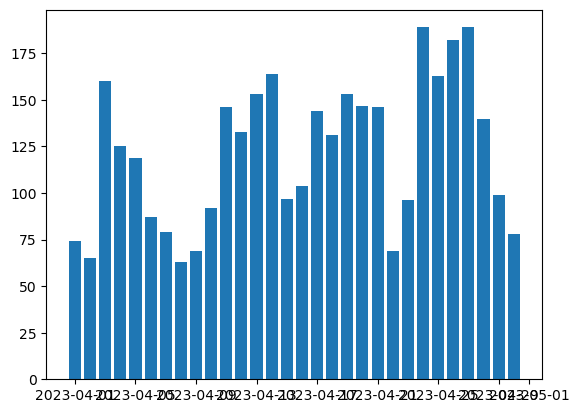

In [21]:
plt.bar('date','activeUsers', data=dfTemp)
plt.show()

In [22]:
import os  
os.makedirs('output/csv', exist_ok=True)  
dfQuery1.to_csv('output/csv/query1.csv')  
